In [198]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md

import seaborn as sns

In [92]:
# function for viewing full dataframes

def print_full_df(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')


In [188]:
all_data = pd.read_excel(
    '/home/forest/OneDrive/CLMS_OTHER_DATA/Neuropsychological Testing (XLS & Notes)/CLMS_Cognition_Summary_-_2022-03-01_REV2.xlsx', 
    sheet_name='Summary',
    header=18)

# easier to use a single header here and refer to the spreadsheet file, rather than the multi-indexing in the excel sheet...

/home/forest/anaconda3/envs/MRI_env/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/forest/anaconda3/envs/MRI_env/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [189]:
# check that none of the column names are duplicated
# output should be "True" if all column names are unique
len(all_data. columns) == len(set(all_data. columns))

True

In [190]:
all_data.head(5)

,SORT,CASE_CODE$,PDF$,M00,M24,at least 1 neuropsych?,M00_DATA,M24_DATA,at least 1 func?,CASE$,COG_DATE,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,SEX$,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,HR_COMMENTS$,ZC_COMMENTS$,FL_NOTES,SUBJECT_ID$,SEX$.1,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,TREATED$,TREAT_DATE,CLIN_DATE,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,1.0,ABC-001_-_48-L-M-SP,link,YES,YES,True,NO,YES,True,ABC-001,2015-11-04 00:00:00,Left,Strongly,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111,1,110.5,6,31,32,1967-03-08 00:00:00,48.659822,14,177,79,Male,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,Engaged,Fire Chief,14,Mild,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,A,47,78.333333,50.4,9.7,-0.350515,37,61.666667,39.4,10.2,-0.235294,.,.,NaN,abc_001,Male,1967-03-08 00:00:00,MS,SPMS,2017-08-01 00:00:00,Untreated,.,2015-11-04 00:00:00,3,1,0,2,1,2,1,0
1,2.0,BCD-002_-_46-R-F-SP,link,YES,YES,True,NO,YES,True,BCD-002,2015-11-23 00:00:00,Right,Strongly,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120,0,132,5,82.5,30.5,1969-10-09 00:00:00,46.121834,16,152,62,Female,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,Married,Housemaker,6,Minimal,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,A,54,90,50.4,9.7,0.371134,33,55.0,39.4,10.2,-0.627451,.,.,NaN,bcd_002,Female,1969-10-09 00:00:00,MS,SPMS,1995-07-01 00:00:00,Untreated,.,2015-11-23 00:00:00,5.5,1,1,4,3,3,2,1
2,3.0,CDE-003_-_38-R-F-RR,link,YES,YES,True,NO,YES,True,CDE-003,2015-11-30 00:00:00,Right,Strongly,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,1977-09-12 00:00:00,38.214921,15,165,102,Female,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,Blank,Blank,11,Minimal,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,A,59,98.333333,50.4,9.7,0.886598,50,83.333333,39.4,10.2,1.039216,.,.,NaN,cde_003,Female,1977-09-12 00:00:00,MS,RRMS,2009-07-01 00:00:00,Untreated,.,2015-11-30 00:00:00,1,0,0,0,0,1,0,0
3,4.0,DEF-004_-_49-R-M-SP,link,YES,YES,True,YES,YES,True,DEF-004,2015-11-19 00:00:00,Right,Strongly,20,87,0,87,74,0,74,46,0,46,17,0,17,79,0,79,92,0,92,41,1,40,23,0,23,69,62,76.5,0,89.5,0,43,20,1966-02-05 00:00:00,49.785079,14,185,90,Male,48,58.31,8.67,-1.189158,47,0,47,6,25,0,25,9,15,86,18,1,50,25,21,4,Blank,Blank,8,Minimal,2,47,36,271,307,0,0,0,0,0,86,88,104,108,96,94,96,96.000000,A,54,90,50.4,9.7,0.371134,46,76.666667,39.4,10.2,0.647059,.,.,NaN,def_004,Male,1966-02-05 00:00:00,MS,SPMS,1996-08-15 00:00:00,Untreated,.,2015-11-19 00:00:00,6.5,1,2,5,3,3,1,1
4,5.0,EFG-005_-_40-L-M-SP,link,YES,YES,True,YES,YES,True,EFG-005,2015-11-26 00:00:00,Left,Moderately,50,81,3,78,55,1,54,41,4,37,26,4,22,50,0,50,78,1,77,40,8,32,29,1,28,57,76,79.5,4,52.5,1,34.5,25,1975-06-13 00:00:00,40.454483,12,185,88,Male,46,59.87,10.49,-1.322212,45,0,45,5,30,1,29,9,14,84,14,1,45,23,17,5,Marrie

In [191]:
# delete row entries for which fmri data is not available
all_data = all_data[(all_data['M00_DATA'] == 'YES') | (all_data['M24_DATA'] == 'YES')]

In [192]:
# keep only required columns for analysis

df = all_data[[
    # SUBJECT, CLINICAL & DEMOGRAPHIC DATA
    'CASE$',
    'COG_DATE', 
    'SUBJECT_ID$', 
    'SEX$', 
    'BIRTH_DATE', 
    'GROUP$',
    'MS_TYPE$',
    'ONSET_DATE',
    'CLIN_DATE',
    'BIRTHDATE',
    'AGE_YRS',
    'EDU_YRS',
    'HEIGHT_CM',
    'WEIGHT_KG',
    
    # HANDEDNESS DATA
    'HANDED$', 
    'DEGREE$',
    'HAND_SCORE']]


# Leonard Tapping Test Scores
df1 = pd.concat([all_data.loc[:, 'DOM_SEQ_TOT1':'OUT_MEA_COR']], axis=1)

# Remainder of Neuropsych Scores
df2 = pd.concat([all_data.loc[:, 'SDM_COR':'PAS2_Z_SCO']], axis=1)

# EDSS and FSS Scores
df3 = pd.concat([all_data.loc[:, 'EDSS':'FSS_CEREBRAL']], axis=1)

df = df.join(df1)
df = df.join(df2)
df = df.join(df3)

df.shape


(44, 110)

In [193]:
df.head(3)

,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,ABC-001,2015-11-04 00:00:00,abc_001,Male,1967-03-08 00:00:00,MS,SPMS,2017-08-01 00:00:00,2015-11-04 00:00:00,1967-03-08 00:00:00,48.659822,14,177,79,Left,Strongly,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111,1,110.5,6,31,32,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,Engaged,Fire Chief,14,Mild,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,A,47,78.333333,50.4,9.7,-0.350515,37,61.666667,39.4,10.2,-0.235294,3,1,0,2,1,2,1,0
1,BCD-002,2015-11-23 00:00:00,bcd_002,Female,1969-10-09 00:00:00,MS,SPMS,1995-07-01 00:00:00,2015-11-23 00:00:00,1969-10-09 00:00:00,46.121834,16,152,62,Right,Strongly,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120,0,132,5,82.5,30.5,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,Married,Housemaker,6,Minimal,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,A,54,90,50.4,9.7,0.371134,33,55.0,39.4,10.2,-0.627451,5.5,1,1,4,3,3,2,1
2,CDE-003,2015-11-30 00:00:00,cde_003,Female,1977-09-12 00:00:00,MS,RRMS,2009-07-01 00:00:00,2015-11-30 00:00:00,1977-09-12 00:00:00,38.214921,15,165,102,Right,Strongly,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,Blank,Blank,11,Minimal,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,A,59,98.333333,50.4,9.7,0.886598,50,83.333333,39.4,10.2,1.039216,1,0,0,0,0,1,0,0


In [194]:
# check for nan values in each column for HC's
nulls = df[df['GROUP$']=='HC'].isnull().sum(axis=0)
print(nulls[nulls > 0])

ONSET_DATE      15
EDSS            15
FSS_VISUAL      15
FSS_BRSTEM      15
FSS_PYRAMID     15
FSS_CEREBELL    15
FSS_SENSORY     15
FSS_BOWBLAD     15
FSS_CEREBRAL    15
dtype: int64


In [184]:
df_HC_test =  df[df['GROUP$']=='HC']
df_HC_test = df_HC_test.dropna(axis=1)
df_HC_test.head(3)

,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO
5,FGH-006,2015-12-10 00:00:00,fgh_006,Male,1971-12-18 00:00:00,HC,HC,2015-12-10 00:00:00,1971-12-18 00:00:00,43.978097,18,172,72,Right,Strongly,26,135,2,133,124,1,123,94,3,91,33,2,31,129,0,129,135,0,135,95,5,90,46,0,46,103,109,126.5,1,135,2,90.5,38.5,63,60.95,11.32,0.181095,88,0,88,13,45,2,43,14,27,120,91,1,12,9,1,2,Married,Pastor,4,Minimal,3,18,69,196,265,0,0,0,0,0,112,94,104,108,108,102,100,104.000000,A,58,96.666667,50.4,9.7,0.783505,53,88.333333,39.4,10.2,1.333333
11,LMN-012,2016-01-14 00:00:00,lmn_012,Female,1977-03-17 00:00:00,HC,HC,2016-01-14 00:00:00,1977-03-17 00:00:00,38.8282,14,165,68,Right,Strongly,18,125,6,119,116,0,116,83,5,78,50,0,50,120,0,120,125,0,125,98,0,98,64,3,61,96,81,118,0,125,6,88,55.5,69,60.95,11.32,0.711131,96,0,96,14,52,0,52,17,31,131,98,1,8,2,5,1,Blank,Blank,7,Minimal,5,32,56,226,282,1,0,0,0,0,96,102,104,86,102,94,96,97.142857,A,49,81.666667,50.4,9.7,-0.14433,42,70,39.4,10.2,0.254902
15,PQR-016,2016-02-25 00:00:00,pqr_016,Male,1985-11-24 00:00:00,HC,HC,2016-02-25 00:00:00,1985-11-24 00:00:00,30.253251,18,182,99,Right,Strongly,24,120,2,118,111,0,111,79,0,79,34,0,34,122,1,121,132,0,132,100,0,100,40,0,40,100,83,116.5,1,126,2,89.5,37,68,65.7,11.64,0.197595,74,0,74,9,47,0,47,15,24,111,77,1,48,23,21,4,Married,Blank,14,Mild,5,25,56,258,314,1,0,0,0,0,102,102,104,86,102,90,92,96.857143,A,47,78.333333,50.4,9.7,-0.350515,18,30,39.4,10.2,-2.098039


In [195]:
# check for nan values in each column for MS subjects
nulls = df[df['GROUP$']=='MS'].isnull().sum(axis=0)
print(nulls[nulls > 0])

ONSET_DATE      4
FSS_VISUAL      2
FSS_BRSTEM      2
FSS_PYRAMID     2
FSS_CEREBELL    2
FSS_SENSORY     2
FSS_BOWBLAD     2
FSS_CEREBRAL    2
dtype: int64


In [176]:
df_MS_test =  df[df['GROUP$']=='MS']
df_MS_test = df_MS_test.dropna(axis=0) # drop rows with nan values
df_MS_test.head(5)

,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
0,ABC-001,2015-11-04 00:00:00,abc_001,Male,1967-03-08 00:00:00,MS,SPMS,2017-08-01 00:00:00,2015-11-04 00:00:00,1967-03-08 00:00:00,48.659822,14,177,79,Left,Strongly,77,145,1,144,106,5,101,96,69,27,28,3,25,115,1,114,77,0,77,91,56,35,42,3,39,214,199,111,1,110.5,6,31,32,56,58.31,8.67,-0.266436,68,0,68,10,29,1,28,9,19,96,39,1,41,27,11,3,Engaged,Fire Chief,14,Mild,5,30,144,215,359,2,0,0,0,0,100,106,104,78,134,100,90,101.714286,A,47,78.333333,50.4,9.7,-0.350515,37,61.666667,39.4,10.2,-0.235294,3,1,0,2,1,2,1,0
1,BCD-002,2015-11-23 00:00:00,bcd_002,Female,1969-10-09 00:00:00,MS,SPMS,1995-07-01 00:00:00,2015-11-23 00:00:00,1969-10-09 00:00:00,46.121834,16,152,62,Right,Strongly,18,128,5,123,118,0,118,87,3,84,29,0,29,122,0,122,136,0,136,88,7,81,33,1,32,89,79,120,0,132,5,82.5,30.5,68,58.31,8.67,1.117647,88,0,88,14,48,0,48,17,31,131,98,1,41,25,11,5,Married,Housemaker,6,Minimal,4,25,25,199,224,1,0,0,0,0,106,100,104,92,92,102,104,100.000000,A,54,90,50.4,9.7,0.371134,33,55.0,39.4,10.2,-0.627451,5.5,1,1,4,3,3,2,1
2,CDE-003,2015-11-30 00:00:00,cde_003,Female,1977-09-12 00:00:00,MS,RRMS,2009-07-01 00:00:00,2015-11-30 00:00:00,1977-09-12 00:00:00,38.214921,15,165,102,Right,Strongly,18,141,6,135,119,1,118,101,9,92,29,2,27,108,0,108,144,0,144,108,21,87,42,4,38,93,86,113.5,1,142.5,6,89.5,32.5,61,60.95,11.32,0.004417,84,0,84,12,45,0,45,15,27,120,91,1,21,13,7,1,Blank,Blank,11,Minimal,6,21,65,150,215,0,0,0,0,0,106,108,104,108,104,108,104,106.000000,A,59,98.333333,50.4,9.7,0.886598,50,83.333333,39.4,10.2,1.039216,1,0,0,0,0,1,0,0
3,DEF-004,2015-11-19 00:00:00,def_004,Male,1966-02-05 00:00:00,MS,SPMS,1996-08-15 00:00:00,2015-11-19 00:00:00,1966-02-05 00:00:00,49.785079,14,185,90,Right,Strongly,20,87,0,87,74,0,74,46,0,46,17,0,17,79,0,79,92,0,92,41,1,40,23,0,23,69,62,76.5,0,89.5,0,43,20,48,58.31,8.67,-1.189158,47,0,47,6,25,0,25,9,15,86,18,1,50,25,21,4,Blank,Blank,8,Minimal,2,47,36,271,307,0,0,0,0,0,86,88,104,108,96,94,96,96.000000,A,54,90,50.4,9.7,0.371134,46,76.666667,39.4,10.2,0.647059,6.5,1,2,5,3,3,1,1
4,EFG-005,2015-11-26 00:00:00,efg_005,Male,1975-06-13 00:00:00,MS,SPMS,2010-07-01 00:00:00,2015-11-26 00:00:00,1975-06-13 00:00:00,40.454483,12,185,88,Left,Moderately,50,81,3,78,55,1,54,41,4,37,26,4,22,50,0,50,78,1,77,40,8,32,29,1,28,57,76,79.5,4,52.5,1,34.5,25,46,59.87,10.49,-1.322212,45,0,45,5,30,1,29,9,14,84,14,1,45,23,17,5,Married,Sheet Metal?,12,Minimal,2,26,46,177,223,0,0,0,0,0,104,88,104,108,98,106,106,102.000000,A,16,26.666667,46.7,9.1,-3.373626,0,0,35.1,9.6,-3.65625,4,0,1,3,2,2,1,0


In [181]:
df_MS_test = df_MS_test.apply(pd.to_numeric, errors='coerce')


In [196]:
df_MS_test.index

Int64Index([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 14, 17, 18, 19, 20, 22, 23, 27,
            29, 36, 38, 42, 46, 51, 52, 55],
           dtype='int64')

In [182]:
df_MS_test.describe(include='all')

,CASE$,COG_DATE,SUBJECT_ID$,SEX$,BIRTH_DATE,GROUP$,MS_TYPE$,ONSET_DATE,CLIN_DATE,BIRTHDATE,AGE_YRS,EDU_YRS,HEIGHT_CM,WEIGHT_KG,HANDED$,DEGREE$,HAND_SCORE,DOM_SEQ_TOT1,DOM_SEQ_ERR1,DOM_SEQ_COR1,NON_SEQ_TOT1,NON_SEQ_ERR1,NON_SEQ_COR1,BI_IN_TOT1,BI_IN_TOT1.1,BI_IN_COR1,BI_OUT_TOT1,BI_OUT_TOT1.1,BI_OUT_COR1,NON_SEQ_TOT2,NON_SEQ_ERR2,NON_SEQ_COR2,DOM_SEQ_TOT2,DOM_SEQ_ERR2,DOM_SEQ_COR2,BI_IN_TOT2,BI_IN_ERR2,BI_IN_COR2,BI_OUT_TOT2,BI_OUT_ERR2,BI_OUT_COR2,SING_RT_TOT,SING_LT_TOT,LT_MEA_COR,LT_TOT_ERR,RT_MEA_COR,RT_TOT_ERR,IN_MEA_COR,OUT_MEA_COR,SDM_COR,SDM_Z_MEA,SDM_Z_SD,SDM_Z_SCO,DSC_TOT_COR,DSC_TOT_ERR,DSC_TOT_SCO,DSC_SS,SYS_TOT_COR,SYS_TOT_ERR,SYS_TOT_SCO,SYS_SS,DSC_SYS_SS,PSI_SCO,PSI_PCT,MFIS_TEST,MFIS_TOT,MFIS_PHY,MFIS_COG,MFIS_PSY,MAR_STATUS$,OCCUPATION$,BDI_TOT_SCO,BDI_CLASS$,TOL_COR_SCO,TOL_MOV_SCO,TOL_INI_TIM,TOL_EXE_TIM,TOL_TOT_TIM,TOL_TIM_VIO,TOL_TY1_VIO,TOL_TY2_VIO,TOL_TOT_VIO,TOL_STB_VIO,TOL_MOV_SS,TOL_COR_SS,TOL_RUV_SS,TOL_TIV_SS,TOL_INT_SS,TOL_EXT_SS,TOL_PRS_SS,AVERAGE,PAS_FORM$,PAS3_TOT_COR,PAS3_PCT_COR,PAS3_Z_MEA,PAS3_Z_SD,PAS3_Z_SCO,PAS2_TOT_COR,PAS2_PCT_COR,PAS2_Z_MEA,PAS2_Z_SD,PAS2_Z_SCO,EDSS,FSS_VISUAL,FSS_BRSTEM,FSS_PYRAMID,FSS_CEREBELL,FSS_SENSORY,FSS_BOWBLAD,FSS_CEREBRAL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,25.000000,25.000000,25.00000,0.0,0.0,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.00000,25.00000,25.000000,25.00000,25.000000,25.000000,25.00000,25.0000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.00000,25.000000,25.000000,25.000000,0.0,0.0,25.000000,0.0,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,0.0,25.000000,25.000000,25.000000,25.000000,25.000000,23.000000,23.000000,23.000000,23.000000,23.000000,25.000000,25.000000,25.000000,25.000000,24.000000,25.000000,25.000000,25.00000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.697248,14.160000,167.920000,78.36000,NaN,NaN,29.8,104.240000,3.240000,101.000000,96.160000,1.640000,94.520000,64.5200,6.680000,57.840000,28.360000,2.840000,25.520000,95.68000,0.520000,95.160000,107.40000,2.24000,105.160000,69.20000,9.920000,59.280000,31.20000,2.1200,29.080000,97.12000,90.600000,97.400000,2.480000,104.340000,5.160000,58.560000,27.300000,53.640000,58.532800,9.977200,-0.522455,67.840000,0.240000,67.600000,9.360000,32.960000,1.240000,31.720000,11.000000,20.360000,100.720000,49.720000,1.0,37.56000,18.360000,16.360000,3.240000,NaN,NaN,9.600000,NaN,3.440000,39.24000,53.480000,238.56000,292.040000,0.960000,0.240000,0.200000,0.440000,0.0,94.200000,95.840000,95.200000,96.800000,101.600000,98.080000,98.080000,97.114286,NaN,41.880000,69.800000,49.216000,9.508000,-0.779291,30.347826,50.579710,38.091304,10.017391,-0.782529,2.640000,0.600000,0.440000,1.600000,1.000000,1.280000,0.520000,0.24000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.633973,1.907878,11.116504,15.79789,NaN,NaN,18.5,25.252525,3.243969,25.813433,21.797706,2.514624,21.325103,22.8603,13.539202,22.837615,11.183619,2.409703,11.094744,22.22746,0.770281,22.050472,25.06824,4.02368,25.540295,25.33443,12.328558,21.904185,14.30035,2.2971,13.347659,28.12964,26.536139,20.756525,3.177001,24.854041,5.698538,22.018136,11.898879,10.045231,2.965828,1.167745,0.989264,14.778024,0.723418,14.645819,2.643861,8.433465,1.234234,8.585453,3.511885,5.514224,15.377256,31.046363,0.0,16.43695,8.321058,7.761443,2.026491,NaN,NaN,7.308671,NaN,1.709776,21.94364,27.762565,121.94947,136.070901,1.836664,0.663325,0.645497,1.121011,0.0,12.179217,9.914972,17.962925,13.784049,9.949874,12.089665,12.075871,8.029919,NaN,13.479367,22.465612,1.761552,0.285657,1.383996,12.444819,20.741365,2.023029,0.282283,1.189

Check that dates generally make sense. 

In [97]:
# check that entered dates are in a reasonable range
date_columns = ['MS_TYPE$', 'COG_DATE', 'BIRTHDATE', 'BIRTH_DATE', 'ONSET_DATE', 'CLIN_DATE']
df_dates = df[date_columns]

df_dates = pd.melt(df_dates, "MS_TYPE$", var_name='date')
df_dates.columns


Index(['MS_TYPE$', 'date', 'value'], dtype='object')

In [107]:
df_dates.head(5)

,MS_TYPE$,date,value
0,SPMS,COG_DATE,2015-11-04
1,SPMS,COG_DATE,2015-11-23
2,RRMS,COG_DATE,2015-11-30
3,SPMS,COG_DATE,2015-11-19
4,SPMS,COG_DATE,2015-11-26


In [111]:
# drop null values, which don't need to be plotted (should be due to HC's and onset date)
df_dates.dropna(axis=0, inplace=True)

df_dates['value'] = df_dates['value'].apply(pd.to_datetime)

In [119]:
df_dates

,MS_TYPE$,date,value
0,SPMS,COG_DATE,2015-11-04
1,SPMS,COG_DATE,2015-11-23
2,RRMS,COG_DATE,2015-11-30
3,SPMS,COG_DATE,2015-11-19
4,SPMS,COG_DATE,2015-11-26
5,HC,COG_DATE,2015-12-10
6,RRMS,COG_DATE,2015-12-14
7,RRMS,COG_DATE,2016-01-18
8,RRMS,COG_DATE,2016-02-08
9,RRMS,COG_DATE,2016-01-11


AttributeError: 'PathCollection' object has no property 'ci'

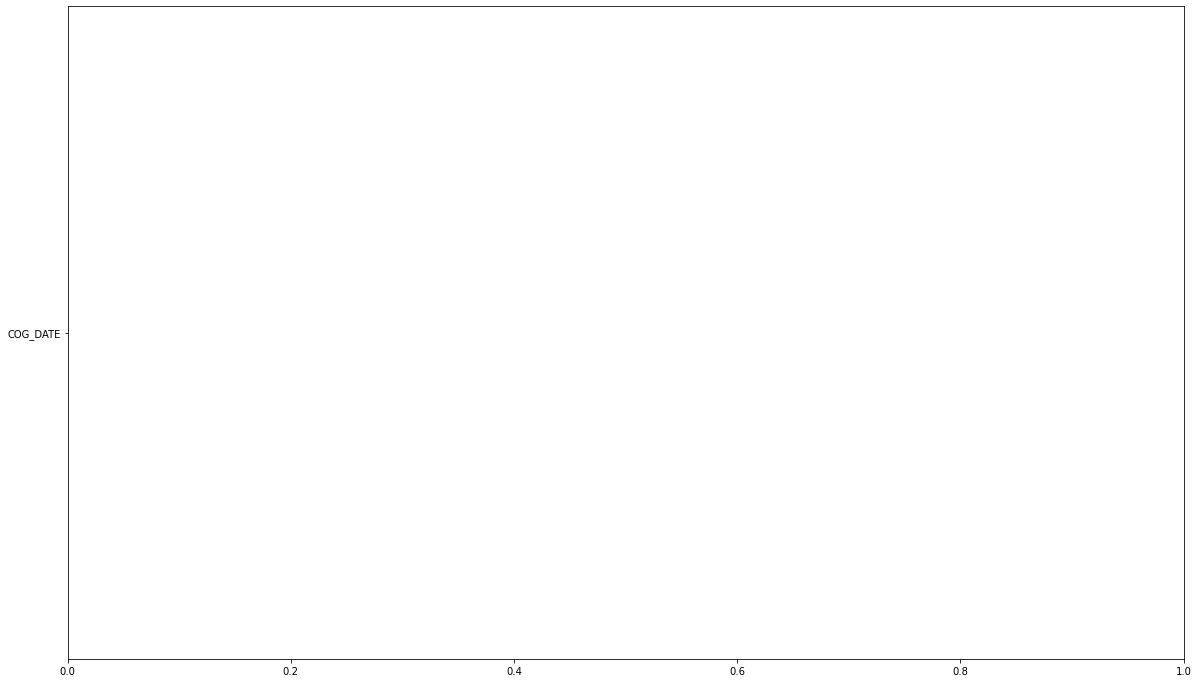

In [121]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

ax = sns.stripplot(data = df_dates, 
                    x='value', 
                    y = 'date', 
                    hue = 'MS_TYPE$',
                    dodge=True,
                    alpha = 0.25,
                    ci=None)

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator(1, month=1, day=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
